In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns



from inspect import getmembers
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from scipy.stats import entropy
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from IPython.display import display
from scipy.spatial import distance


import matplotlib.pyplot as plt
%matplotlib inline
import graphviz

Problem 1

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


X = iris.data
y = iris.target

classes = iris.target_names

In [4]:
## trains decision tree classifiers with varying maximum depths, and evaluates their performance using classification_report
for n in range (1,6):

    clf = tree.DecisionTreeClassifier(min_samples_leaf = 2,min_samples_split = 5,max_depth=n)
    clf = clf.fit(X,y)

    expected = y
    predicted = clf.predict(X)

    print('Depth', n)
    print(metrics.classification_report(expected,
                                    predicted))

Depth 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.50      1.00      0.67        50
           2       0.00      0.00      0.00        50

    accuracy                           0.67       150
   macro avg       0.50      0.67      0.56       150
weighted avg       0.50      0.67      0.56       150

Depth 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Depth 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        

/Users/rafagee/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rafagee/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rafagee/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

According to the results above, depth 4 and 5 will result in the highes recall. They both have an macro avg and a weighted avg of 0.98, the hihgest compared to other depths. Adding more depth resulted in a greater correct positive classifications. This explains why Depth 1 has the lowest precission. Based on the resuslts above we can also see that depth 5 and depth 4 resulted the best F1 score. According to Stack Exchange, a macro-average will treat all classses equally by caclulating the metric independently for each class and then take the averag, on the other hand, a micro-average will aggregate the contributions of all classes to compute the average metric. The weighted average calculates the metric score for each class independently but when it adds them together it usess a weight that is dependent on the number of true labels of each class:

Problem 2

In [13]:
breast_cancer_df = pd.read_csv("breast-cancer-wisconsin.data", names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"])
breast_cancer_df.drop(columns = 'Bare Nuclei')

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,2
696,888820,5,10,10,3,7,8,10,2,4
697,897471,4,8,6,4,3,10,6,1,4


In [14]:
x_breast_cancer = breast_cancer_df.drop(columns = ['Bare Nuclei',"Sample code number"]).iloc[:,:-1].values
y_breast_cancer =  breast_cancer_df.iloc[:,-1].values 


In [16]:
##Train decision tree and print classification report
clf2 = tree.DecisionTreeClassifier(min_samples_leaf = 2,min_samples_split = 5,max_depth=2)
clf2 = clf.fit(x_breast_cancer,y_breast_cancer)

expected2 = y_breast_cancer
predicted2 = clf2.predict(x_breast_cancer)
print(metrics.classification_report(expected2,predicted2))

              precision    recall  f1-score   support

           2       0.96      0.99      0.97       458
           4       0.97      0.92      0.94       241

    accuracy                           0.96       699
   macro avg       0.97      0.95      0.96       699
weighted avg       0.96      0.96      0.96       699



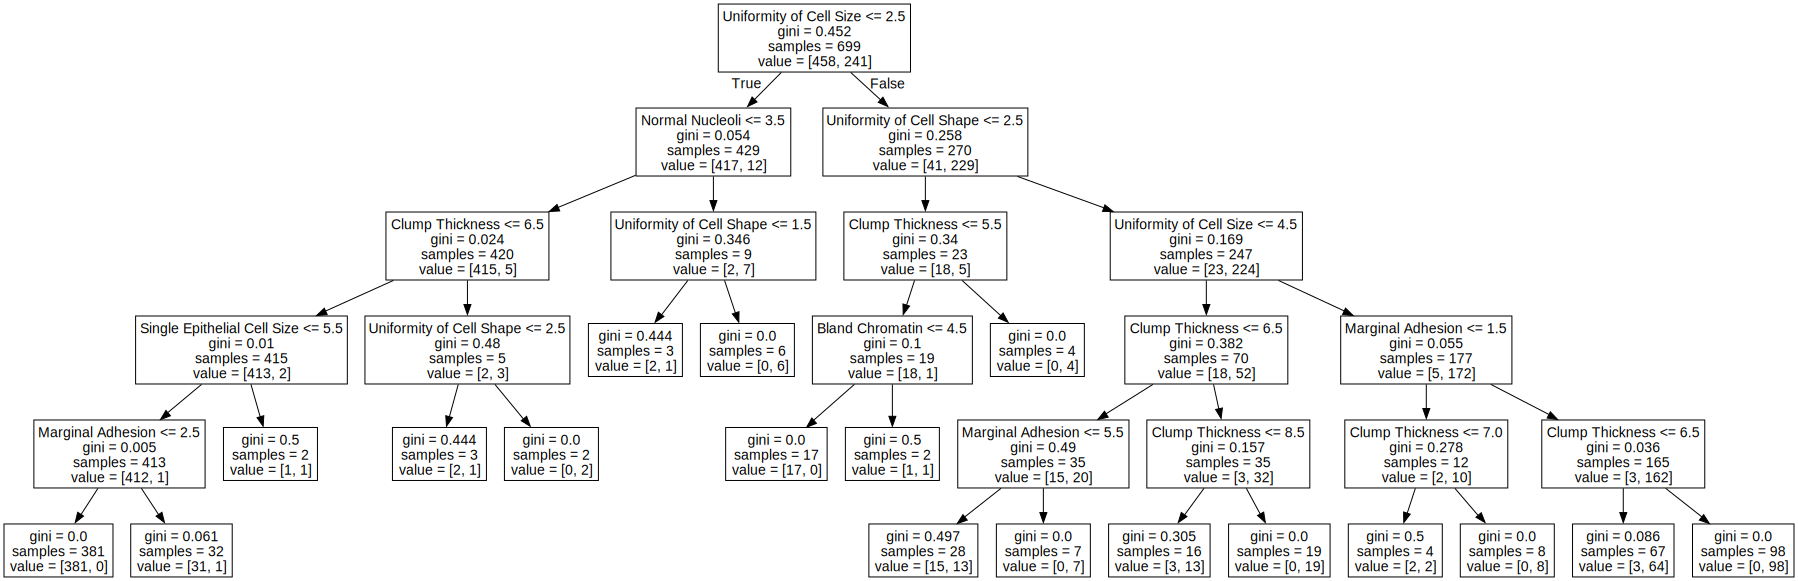

In [20]:
##Visualize Decision Tree
graphviz.Source(tree.export_graphviz(clf2,feature_names=["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size","Bland Chromatin","Normal Nucleoli","Mitoses"]))


In [22]:
#Based on the graph of the decisison tree we can see that for the first split we have
Gini_Split1 = 0.054 + 0.258
print(f"Gini Split: ",Gini_Split1)
#Entropy
p = 458/699
entropy = -458/699*math.log(458/699) 
print(f"Entropy: ",entropy)


Gini Split:  0.312
Entropy:  0.27701567041314507


The feature selected for the first split is Uniformity of Cell size and its detemrined by a value that is <= 2.5

In [24]:
df2 = pd.read_csv("wdbc.data", names = ['id','diagnosis','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'])

df2_data=df2.replace(['M','B'],[1,0])

In [25]:
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

In [26]:
x_wdbc = df2_data.iloc[:,:-1].values
y_wdbc = df2_data.iloc[:,1].values 

In [27]:
#Standardize X values or features
X = StandardScaler().fit_transform(x_wdbc)

#Create PCA instance that calculates two components
pca = PCA(n_components = 2)

#fit and transform the standardized feature data into pca object
principalComponents = pca.fit_transform(x_wdbc)

#Create new DF for PCA principal componets
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])

finalDf = pd.concat([principalDf, df2_data[['diagnosis']]], axis = 1)

X1 = (finalDf['principal component 1']).to_numpy().reshape(-1,1)
X2 = (finalDf['principal component 2']).to_numpy().reshape(-1,1)

In [28]:
clf3 = tree.DecisionTreeClassifier(min_samples_leaf = 2,min_samples_split = 5,max_depth=2)
clf3 = clf3.fit(X1,y_wdbc)


expected3 = y_wdbc
predicted3 = clf3.predict(X1)
print(metrics.classification_report(expected3,predicted3))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       357
           1       0.97      0.14      0.25       212

    accuracy                           0.68       569
   macro avg       0.81      0.57      0.52       569
weighted avg       0.78      0.68      0.59       569



In [29]:
clf4 = tree.DecisionTreeClassifier(min_samples_leaf = 2,min_samples_split = 5,max_depth=2)
clf4 = clf.fit(x_wdbc,y_wdbc)

expected4 = y_wdbc
predicted4 = clf4.predict(x_wdbc)
print(metrics.classification_report(expected4,predicted4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       212

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



The model based on the first principal component has less precision, recall and f1-score than the one based off of the original data.



In [30]:
clf5 = tree.DecisionTreeClassifier(min_samples_leaf = 2,min_samples_split = 5,max_depth=2)
clf5 = clf5.fit(X2,y_wdbc)


expected5 = y_wdbc
predicted5 = clf5.predict(X2)
print(metrics.classification_report(expected5,predicted5))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       357
           1       0.95      0.79      0.87       212

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



In [33]:
#Confusion Matrix using PC1
cnf_matrix1 = metrics.confusion_matrix(y_wdbc,predicted3)
print(cnf_matrix1)

[[356   1]
 [182  30]]


In [35]:
#Confusion Matrix Using PC2
cnf_matrix2 = metrics.confusion_matrix(y_wdbc,predicted5)
print(cnf_matrix2)

[[349   8]
 [ 44 168]]


In [36]:
##Classification Scores for Decision Tree using PC1 and for Decision Tree using PC2 
FP = cnf_matrix2.sum(axis=0) - np.diag(cnf_matrix2)  
FN = cnf_matrix2.sum(axis=1) - np.diag(cnf_matrix2)
TP = np.diag(cnf_matrix2)
TN = cnf_matrix2.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)e
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
